In [35]:
import numpy as np
import keras
from keras.datasets import mnist
import math

In [36]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train.shape

(60000, 28, 28)

In [37]:
y_train.shape

(60000,)

In [38]:
for a in range(len(y_train)):
    if (y_train[a]==y_train[0]):          # Training the model on the first image using Binary Classification
        y_train[a]=1                     
    else:
        y_train[a]=0

In [39]:
y_train

array([1, 0, 0, ..., 0, 0, 0], dtype=uint8)

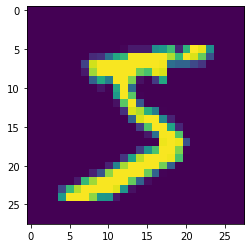

In [40]:
# Uses matplotlib to display values stored in mnist_data.
import matplotlib.pyplot as plt
image=x_train[0]
plt.imshow(image)                                     
plt.show()                                               

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K
from sklearn.model_selection import GridSearchCV

In [42]:
num_classes = 10

In [43]:
img_rows, img_cols = 28, 28

In [44]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)


In [45]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [46]:
# Convert class vectors to binary class matrices
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train.shape

(60000,)

In [47]:
y_train.argmax(axis=0)

0

In [48]:
x_train.size

47040000

In [49]:
x_train.ndim

4

In [50]:
x_train.shape

(60000, 28, 28, 1)

In [51]:
f_img_array = [item.flatten() for item in x_train] # Array of size=60000 of flattened image

In [52]:
# Array of weights initialized to zero
weights = np.asarray([0.0 for count in range(x_train.shape[1] * x_train.shape[2] + 1)])
weights.shape = (weights.shape[0], 1)
weights.shape

(785, 1)

In [53]:
# Array of randomly initialized weights 
weights2 = np.random.randn(x_train.shape[1]*x_train.shape[2]+1,1)
weights2.shape

(785, 1)

In [54]:
def w_sum(image, weight):
    image2=image.flatten()
    wgt_sum=0
    wgt_sum+=weight[0]
    for i in range (len(image2)):
        wgt_sum += (weight[i+1] * (image2[i]))    # Calculating the weighted sum with bias
        
    return wgt_sum

In [55]:
def total_w_sum(image_array, weight):
    lenth=len(image_array)

    t_w_sum = np.arange(lenth, dtype=float)

    for i in range(len(image_array)):
        t_w_sum[i] = w_sum(image_array[i], weight)
        
    return t_w_sum

In [56]:
def activate_func(value):
    if value > 500:                              # Setting a threshold for weighted sum calculation
        value = 500
    if value < -500:
        value = -500
    out_value=0
    out_value=1/(1+math.exp(-1 * value))         # Activation: Sigmoid
    return out_value

In [57]:
def t_activation(in_array):
    activ_array = np.asarray([0.0 for count in range(len(in_array))])
    
    for b in range(len(in_array)):
        value=activate_func(in_array[b])
        if (value>0.7):
            activ_array[b]=1
        else:
            activ_array[b]=0
        
    return activ_array

In [58]:
# t_activation(output)

In [59]:
def loss_func(learn_rate, image, expected, predicted, weights_array):
    
    error=np.asarray([0.0 for count in range(len(weights_array))])
    diff=expected-predicted                      
    
    error[0]=learn_rate*diff                     # Error for bias term is calculated using a weighted sum of 1
    for j in range(1, len(weights_array)):       
            error[j]=learn_rate*diff*image[j-1]  
    
    for t in range(len(weights_array)):
        weights_array[t]+=error[t]               # Updating the weights for every pixel in image

In [60]:
def t_loss_func(learn_rate, images_arr, expected_arr, predicted_array, weights_array):
    
    for i in range(0, len(predicted_array)):   
        loss_func(learn_rate, images_arr[i], expected_arr[i], predicted_array[i], weights_array)
    
    for t in range(len(weights_array)):       
        print(weights_array[t])                  # Updated weights array after 1 epoch

In [61]:
def main():
    for i in range(5):
        output=np.array([])
        output = total_w_sum(x_train, weights2)
        t_loss_func(0.001, f_img_array, y_train, t_activation(output), weights2)
        print('End of epoch {}\n\n'.format(i))

In [62]:
main()

[0.52425051]
[1.22683224]
[-0.88989741]
[0.52421432]
[0.93573739]
[0.48900448]
[-1.07517674]
[1.01112415]
[0.85183133]
[-2.43825232]
[0.98157154]
[1.22794446]
[0.2315458]
[-2.28776299]
[-0.1283012]
[2.87588992]
[1.96147683]
[-0.51580796]
[0.87142169]
[1.14326721]
[0.88715676]
[-0.11055496]
[-0.30564086]
[-1.82829338]
[0.84697892]
[0.77467652]
[-0.15201727]
[-0.6072073]
[-1.03024591]
[0.44182393]
[-1.55178247]
[0.05467608]
[-0.17194736]
[0.58860274]
[-3.05245552]
[0.30979277]
[0.77999625]
[0.06963251]
[-0.35853678]
[1.5690195]
[-0.41715399]
[0.15910241]
[-0.30995522]
[-0.42708784]
[-1.34557863]
[1.74085443]
[1.34950471]
[1.1130835]
[-1.15908236]
[1.60407896]
[-0.48429672]
[-0.38892307]
[-0.67925607]
[-0.06181202]
[-0.24229097]
[-0.79492198]
[-1.68785875]
[0.30205929]
[-0.07530783]
[-1.75947836]
[-1.1308946]
[0.83241169]
[-0.57784303]
[0.09839732]
[1.15958041]
[-1.05282474]
[0.19970788]
[1.23399149]
[-1.16856667]
[-0.74684688]
[-0.80670576]
[-1.60924218]
[0.36364552]
[-0.80107632]
[0.161

[-4.11774949]
[1.22683224]
[-0.88989741]
[0.52421432]
[0.93573739]
[0.48900448]
[-1.07517674]
[1.01112415]
[0.85183133]
[-2.43825232]
[0.98157154]
[1.22794446]
[0.2315458]
[-2.28776299]
[-0.1283012]
[2.87588992]
[1.96147683]
[-0.51580796]
[0.87142169]
[1.14326721]
[0.88715676]
[-0.11055496]
[-0.30564086]
[-1.82829338]
[0.84697892]
[0.77467652]
[-0.15201727]
[-0.6072073]
[-1.03024591]
[0.44182393]
[-1.55178247]
[0.05467608]
[-0.17194736]
[0.58860274]
[-3.05245552]
[0.30979277]
[0.77998449]
[0.06905996]
[-0.35930933]
[1.56818421]
[-0.41804811]
[0.15818476]
[-0.31041012]
[-0.42766431]
[-1.34660608]
[1.73852109]
[1.34866157]
[1.11303252]
[-1.15908236]
[1.60407896]
[-0.48429672]
[-0.38892307]
[-0.67925607]
[-0.06181202]
[-0.24229097]
[-0.79492198]
[-1.68785875]
[0.30205929]
[-0.07530783]
[-1.75947836]
[-1.1308946]
[0.83241169]
[-0.57784303]
[0.09839732]
[1.15935296]
[-1.05549141]
[0.19429219]
[1.22657188]
[-1.17740197]
[-0.7561606]
[-0.81577243]
[-1.61928924]
[0.35229258]
[-0.81962926]
[0.1

[2.62525051]
[1.22683224]
[-0.88989741]
[0.52421432]
[0.93573739]
[0.48900448]
[-1.07517674]
[1.01112415]
[0.85183133]
[-2.43825232]
[0.98157154]
[1.22794446]
[0.2315458]
[-2.28776299]
[-0.1283012]
[2.87588992]
[1.96147683]
[-0.51580796]
[0.87142169]
[1.14326721]
[0.88715676]
[-0.11055496]
[-0.30564086]
[-1.82829338]
[0.84697892]
[0.77467652]
[-0.15201727]
[-0.6072073]
[-1.03024591]
[0.44182393]
[-1.55178247]
[0.05467608]
[-0.17194736]
[0.58860274]
[-3.05245552]
[0.30979277]
[0.77998449]
[0.06905996]
[-0.35930933]
[1.56818421]
[-0.41804811]
[0.15818476]
[-0.31041012]
[-0.42644078]
[-1.34461392]
[1.73879952]
[1.34866157]
[1.11303252]
[-1.15908236]
[1.60407896]
[-0.48429672]
[-0.38892307]
[-0.67925607]
[-0.06181202]
[-0.24229097]
[-0.79492198]
[-1.68785875]
[0.30205929]
[-0.07530783]
[-1.75947836]
[-1.1308946]
[0.83241169]
[-0.57784303]
[0.09839732]
[1.15935296]
[-1.05549141]
[0.19429219]
[1.22690914]
[-1.1767353]
[-0.75494884]
[-0.8112038]
[-1.61141473]
[0.3630769]
[-0.81320966]
[0.1375

[-7.89774949]
[1.22683224]
[-0.88989741]
[0.52421432]
[0.93573739]
[0.48900448]
[-1.07517674]
[1.01112415]
[0.85183133]
[-2.43825232]
[0.98157154]
[1.22794446]
[0.2315458]
[-2.28776299]
[-0.1283012]
[2.87588992]
[1.96147683]
[-0.51580796]
[0.87142169]
[1.14326721]
[0.88715676]
[-0.11055496]
[-0.30564086]
[-1.82829338]
[0.84697892]
[0.77467652]
[-0.15201727]
[-0.6072073]
[-1.03024591]
[0.44182393]
[-1.55178247]
[0.05467608]
[-0.17194736]
[0.58860274]
[-3.05245552]
[0.30979277]
[0.77997272]
[0.06848741]
[-0.36018384]
[1.56652539]
[-0.41991086]
[0.15700829]
[-0.31164542]
[-0.42819764]
[-1.34614333]
[1.73252109]
[1.3436851]
[1.10996978]
[-1.16160785]
[1.60259269]
[-0.48528888]
[-0.38900542]
[-0.67925607]
[-0.06181202]
[-0.24229097]
[-0.79492198]
[-1.68785875]
[0.30205929]
[-0.07530783]
[-1.75947836]
[-1.1308946]
[0.83241169]
[-0.5780195]
[0.09723654]
[1.15691374]
[-1.06180514]
[0.18261768]
[1.206066]
[-1.20481765]
[-0.78506648]
[-0.84325478]
[-1.65286963]
[0.31506513]
[-0.87617044]
[0.0492

[-1.15474949]
[1.22683224]
[-0.88989741]
[0.52421432]
[0.93573739]
[0.48900448]
[-1.07517674]
[1.01112415]
[0.85183133]
[-2.43825232]
[0.98157154]
[1.22794446]
[0.2315458]
[-2.28776299]
[-0.1283012]
[2.87588992]
[1.96147683]
[-0.51580796]
[0.87142169]
[1.14326721]
[0.88715676]
[-0.11055496]
[-0.30564086]
[-1.82829338]
[0.84697892]
[0.77467652]
[-0.15201727]
[-0.6072073]
[-1.03024591]
[0.44182393]
[-1.55178247]
[0.05467608]
[-0.17194736]
[0.58860274]
[-3.05245552]
[0.30979277]
[0.77997272]
[0.06848741]
[-0.36018384]
[1.56652539]
[-0.41991086]
[0.15700829]
[-0.31164542]
[-0.42697411]
[-1.34415118]
[1.73279952]
[1.3436851]
[1.10996978]
[-1.16160785]
[1.60259269]
[-0.48528888]
[-0.38900542]
[-0.67925607]
[-0.06181202]
[-0.24229097]
[-0.79492198]
[-1.68785875]
[0.30205929]
[-0.07530783]
[-1.75947836]
[-1.1308946]
[0.83241169]
[-0.5780195]
[0.09723654]
[1.15691374]
[-1.06180514]
[0.18261768]
[1.20640326]
[-1.20415099]
[-0.78385472]
[-0.83868615]
[-1.64499512]
[0.32584944]
[-0.86975083]
[0.05

In [63]:
weights2.shape

(785, 1)

In [64]:
weights3=np.delete(weights2, 0)                  
weights3=weights3.reshape((28,28))               # Mapping onto a 28*28 matrix

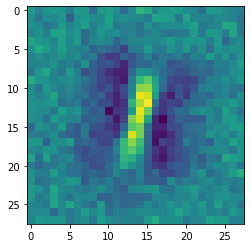

In [65]:
plt.imshow(weights3)